importing libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import string
import pyLDAvis.sklearn
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import contractions
from autocorrect import spell
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.plotly as py
import matplotlib.pyplot as plt

plt.xticks(rotation=70)
%matplotlib inline
import pandas as pd
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [121]:
df=pd.read_csv("reddit_Clean.csv")

knwoing how much polarity is there in question,explanation(body) and comments

In [122]:
df['sentiment_questions'] = df['list_lemma_questions'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_explanation'] = df['list_lemma_explanation'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_comments'] = df['list_lemma_comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [123]:
df.head()



,Unnamed: 0,questions,comments,explanation,flare,cleaned_comments,cleaned_comments_single,no_contract_questions,no_contract_explanation,no_contract_comments,...,stopwords_removed_comments,lematized_questions,lematized_explanation,lematized_comments,list_lemma_questions,list_lemma_explanation,list_lemma_comments,sentiment_questions,sentiment_explanation,sentiment_comments
0,0,how much money should average india youth spen...,"[""10-15k, nowadays about 17k that's where most...",average india youth got entry level job softwa...,AskIndia,['15k nowadays about 17k that where most midra...,15k nowadays about 17k that where most midrang...,"['how', 'much', 'money', 'should', 'average', ...","['average', 'india', 'youth', 'got', 'entry', ...","['15k', 'nowadays', 'about', '17k', 'that', 'w...",...,"['15k', 'nowadays', '17k', 'midrange', 'smartp...","['much', 'money', 'average', 'india', 'youth',...","['average', 'india', 'youth', 'get', 'entry', ...","['15k', 'nowadays', '17k', 'midrange', 'smartp...",much money average india youth spend smartphone,average india youth get entry level job softwa...,15k nowadays 17k midrange smartphones 15k nowa...,0.025,0.016667,0.184849
1,1,need help regarding career specifically mba,['Indian MBA lays a lot of emphasis on acads a...,tldr appeared for cat this year getting reject...,AskIndia,['india mba lays lot emphasis acads and even d...,india mba lays lot emphasis acads and even dur...,"['need', 'help', 'regarding', 'career', 'speci...","['tldr', 'appeared', 'for', 'cat', 'this', 'ye...","['india', 'mba', 'lays', 'lot', 'emphasis', 'a...",...,"['india', 'mba', 'lays', 'lot', 'emphasis', 'a...","['need', 'help', 'regard', 'career', 'specific...","['tldr', 'appear', 'cat', 'year', 'get', 'reje...","['india', 'mba', 'lay', 'lot', 'emphasis', 'ac...",need help regard career specifically mba,tldr appear cat year get reject college due po...,india mba lay lot emphasis acads even summer i...,0.000,-0.027829,0.203947
2,2,why mobile premiere league mpl legal india,"[""There are two types of games - Games of Skil...",far understand you can buy coins with real mon...,AskIndia,['there are two types games games skill and ga...,there are two types games games skill and game...,"['why', 'mobile', 'premiere', 'league', 'mpl',...","['far', 'understand', 'you', 'can', 'buy', 'co...","['there', 'are', 'two', 'types', 'games', 'gam...",...,"['two', 'types', 'games', 'games', 'skill', 'g...","['mobile', 'premiere', 'league', 'mpl', 'legal...","['far', 'understand', 'buy', 'coin', 'real', '...","['two', 'type', 'game', 'game', 'skill', 'game...",mobile premiere league mpl legal india,far understand buy coin real money try high sc...,two type game game skill game chance game chan...,0.200,0.088750,-0.137093
3,3,stray cat trouble need advice,"[""Lure the cat into a cage/cardboard box if yo...",stray cat year old lives apartment building de...,AskIndia,['lure the cat into cage cardboard box you hav...,lure the cat into cage cardboard box you have ...,"['stray', 'cat', 'trouble', 'need', 'advice']","['stray', 'cat', 'year', 'old', 'lives', 'apar...","['lure', 'the', 'cat', 'into', 'cage', 'cardbo...",...,"['lure', 'cat', 'cage', 'cardboard', 'box', 'o...","['stray', 'cat', 'trouble', 'need', 'advice']","['stray', 'cat', 'year', 'old', 'live', 'apart...","['lure', 'cat', 'cage', 'cardboard', 'box', 'o...",stray cat trouble need advice,stray cat year old live apartment build delhi ...,lure cat cage cardboard box one put towel top ...,-0.200,0.003306,0.044048
4,4,expressvpn hotstar issue,"['Me: reads titles thinks ""oh just root your ...",all new express vpn and reddit have question w...,AskIndia,['reads titles thinks just root your phone rea...,reads titles thinks just root your phone reads...,"['expressvpn', 'hotstar', 'issue']","['all', 'new', 'express', 'vpn', 'and', 'reddi...","['reads', 'titles', 'thinks', 'just', 'root', ...",...,"['reads', 'titles', 'thinks', 'root', 'phone',...","['expressvpn', 'hotstar', 'issue']","['

find the string length and wordcount of each question,explanation and comments

In [124]:
# create a new feature for length of the review
df['len_questions'] = df['lematized_questions'].astype(str).apply(len)
df['word_count_questions'] = df['lematized_questions'].apply(lambda x: len(str(x).split()))
df['len_explanation'] = df['lematized_explanation'].astype(str).apply(len)
df['word_count_explanation'] = df['lematized_explanation'].apply(lambda x: len(str(x).split()))
df['len_comments'] = df['lematized_comments'].astype(str).apply(len)
df['word_count_comments'] = df['lematized_comments'].apply(lambda x: len(str(x).split()))

# questions

##### now drawing how questions asked by users are in diffrent distributions


finding the most common words in all questions

In [125]:
# freqdist takes a iterable of strings but df['lemmatize'] is an iterable of lists.  We need to combine all the 
# lists together into one list of iterable strings
from ast import literal_eval
df.lematized_questions=df.lematized_questions.apply(lambda x:literal_eval(x))

words = df['lematized_questions']
allwords = []
for wordlist in words:
    allwords += wordlist

FreqDist(allwords)

FreqDist({'india': 747, 'thread': 252, 'discussion': 213, 'random': 206, 'covid': 184, '2020': 170, 'lockdown': 161, 'coronavirus': 150, 'night': 114, 'daily': 113, ...})

In [126]:
fdist = FreqDist(allwords)
mostcommon = fdist.most_common(25)
print(mostcommon)

[('india', 747), ('thread', 252), ('discussion', 213), ('random', 206), ('covid', 184), ('2020', 170), ('lockdown', 161), ('coronavirus', 150), ('night', 114), ('daily', 113), ('late', 110), ('15am', 102), ('delhi', 94), ('time', 89), ('world', 74), ('help', 70), ('test', 70), ('take', 69), ('need', 67), ('say', 67), ('will', 67), ('news', 64), ('bank', 62), ('new', 62), ('case', 61)]


for each flare seeing the most common words present in questions asked by users

In [127]:
group_by = df.groupby('flare')['list_lemma_questions'].apply(lambda x: Counter(' '.join(x).split()).most_common(20))
print(group_by)

flare
AskIndia                  [(india, 54), (need, 23), (help, 20), (lockdow...
Business_and_Finance      [(india, 56), (bank, 45), (yes, 30), (coronavi...
CAA-NRC-NPR               [(caa, 19), (india, 10), (delhi, 7), (jamia, 6...
Coronavirus               [(india, 93), (covid, 90), (lockdown, 45), (co...
Food                      [(india, 70), (food, 34), (make, 14), (eat, 13...
NonPolitical              [(india, 56), (lockdown, 29), (covid, 13), (co...
Photography               [(india, 45), (shot, 42), (delhi, 24), (take, ...
Policy_Economy            [(india, 91), (coronavirus, 32), (covid, 26), ...
Politics                  [(india, 67), (lockdown, 31), (modi, 25), (cor...
Scheduled                 [(thread, 250), (discussion, 208), (random, 20...
Science_and_Technology    [(india, 95), (coronavirus, 17), (covid, 16), ...
Sports                    [(india, 109), (world, 32), (cup, 24), (woman,...
Name: list_lemma_questions, dtype: object


In [128]:
dfgroup_by = pd.DataFrame(group_by)
dfgroup_by.reset_index(inplace=True)


In [129]:
dfgroup_by

,flare,list_lemma_questions
0,AskIndia,"[(india, 54), (need, 23), (help, 20), (lockdow..."
1,Business_and_Finance,"[(india, 56), (bank, 45), (yes, 30), (coronavi..."
2,CAA-NRC-NPR,"[(caa, 19), (india, 10), (delhi, 7), (jamia, 6..."
3,Coronavirus,"[(india, 93), (covid, 90), (lockdown, 45), (co..."
4,Food,"[(india, 70), (food, 34), (make, 14), (eat, 13..."
5,NonPolitical,"[(india, 56), (lockdown, 29), (covid, 13), (co..."
6,Photography,"[(india, 45), (shot, 42), (delhi, 24), (take, ..."
7,Policy_Economy,"[(india, 91), (coronavirus, 32), (covid, 26), ..."
8,Politics,"[(india, 67), (lockdown, 31), (modi, 25), (cor..."
9,Scheduled,"[(thread, 250), (discussion, 208), (random, 20..."


WordCloud  of most common words on all questions

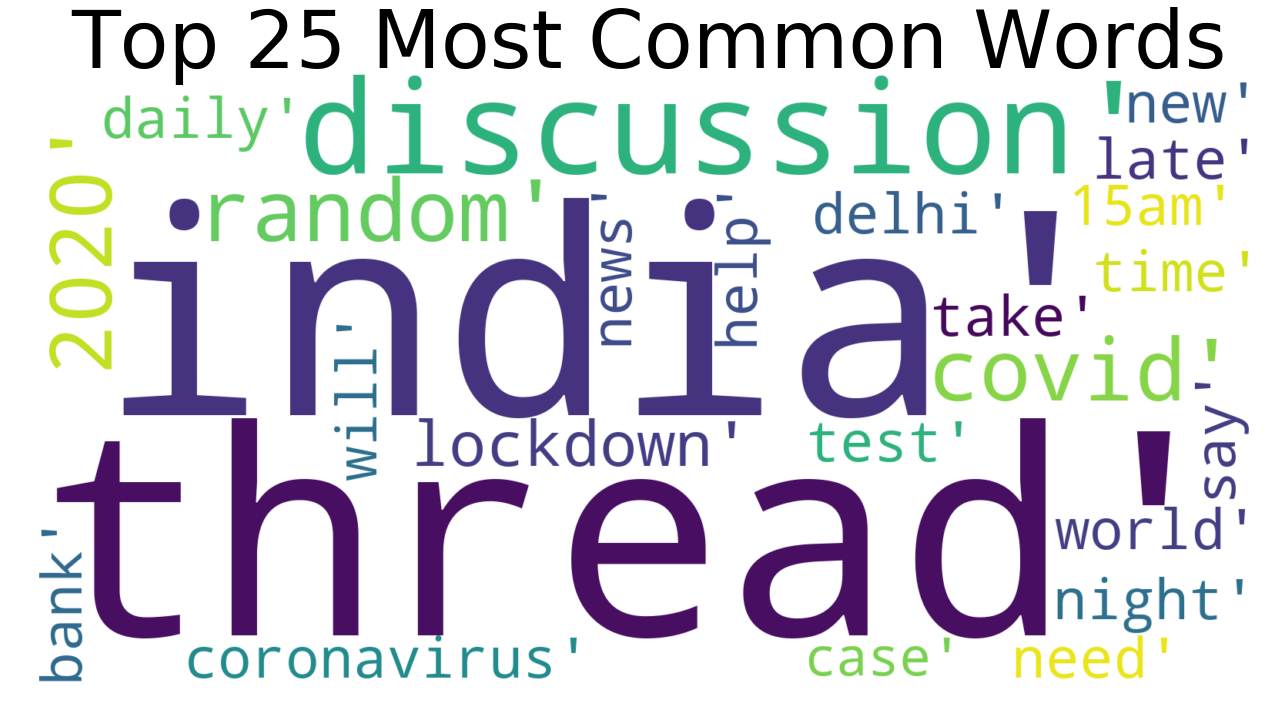

In [130]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 25 Most Common Words', fontsize=80)
plt.tight_layout(pad=1)
plt.show()


seeing how much frequently the most common words present in questions

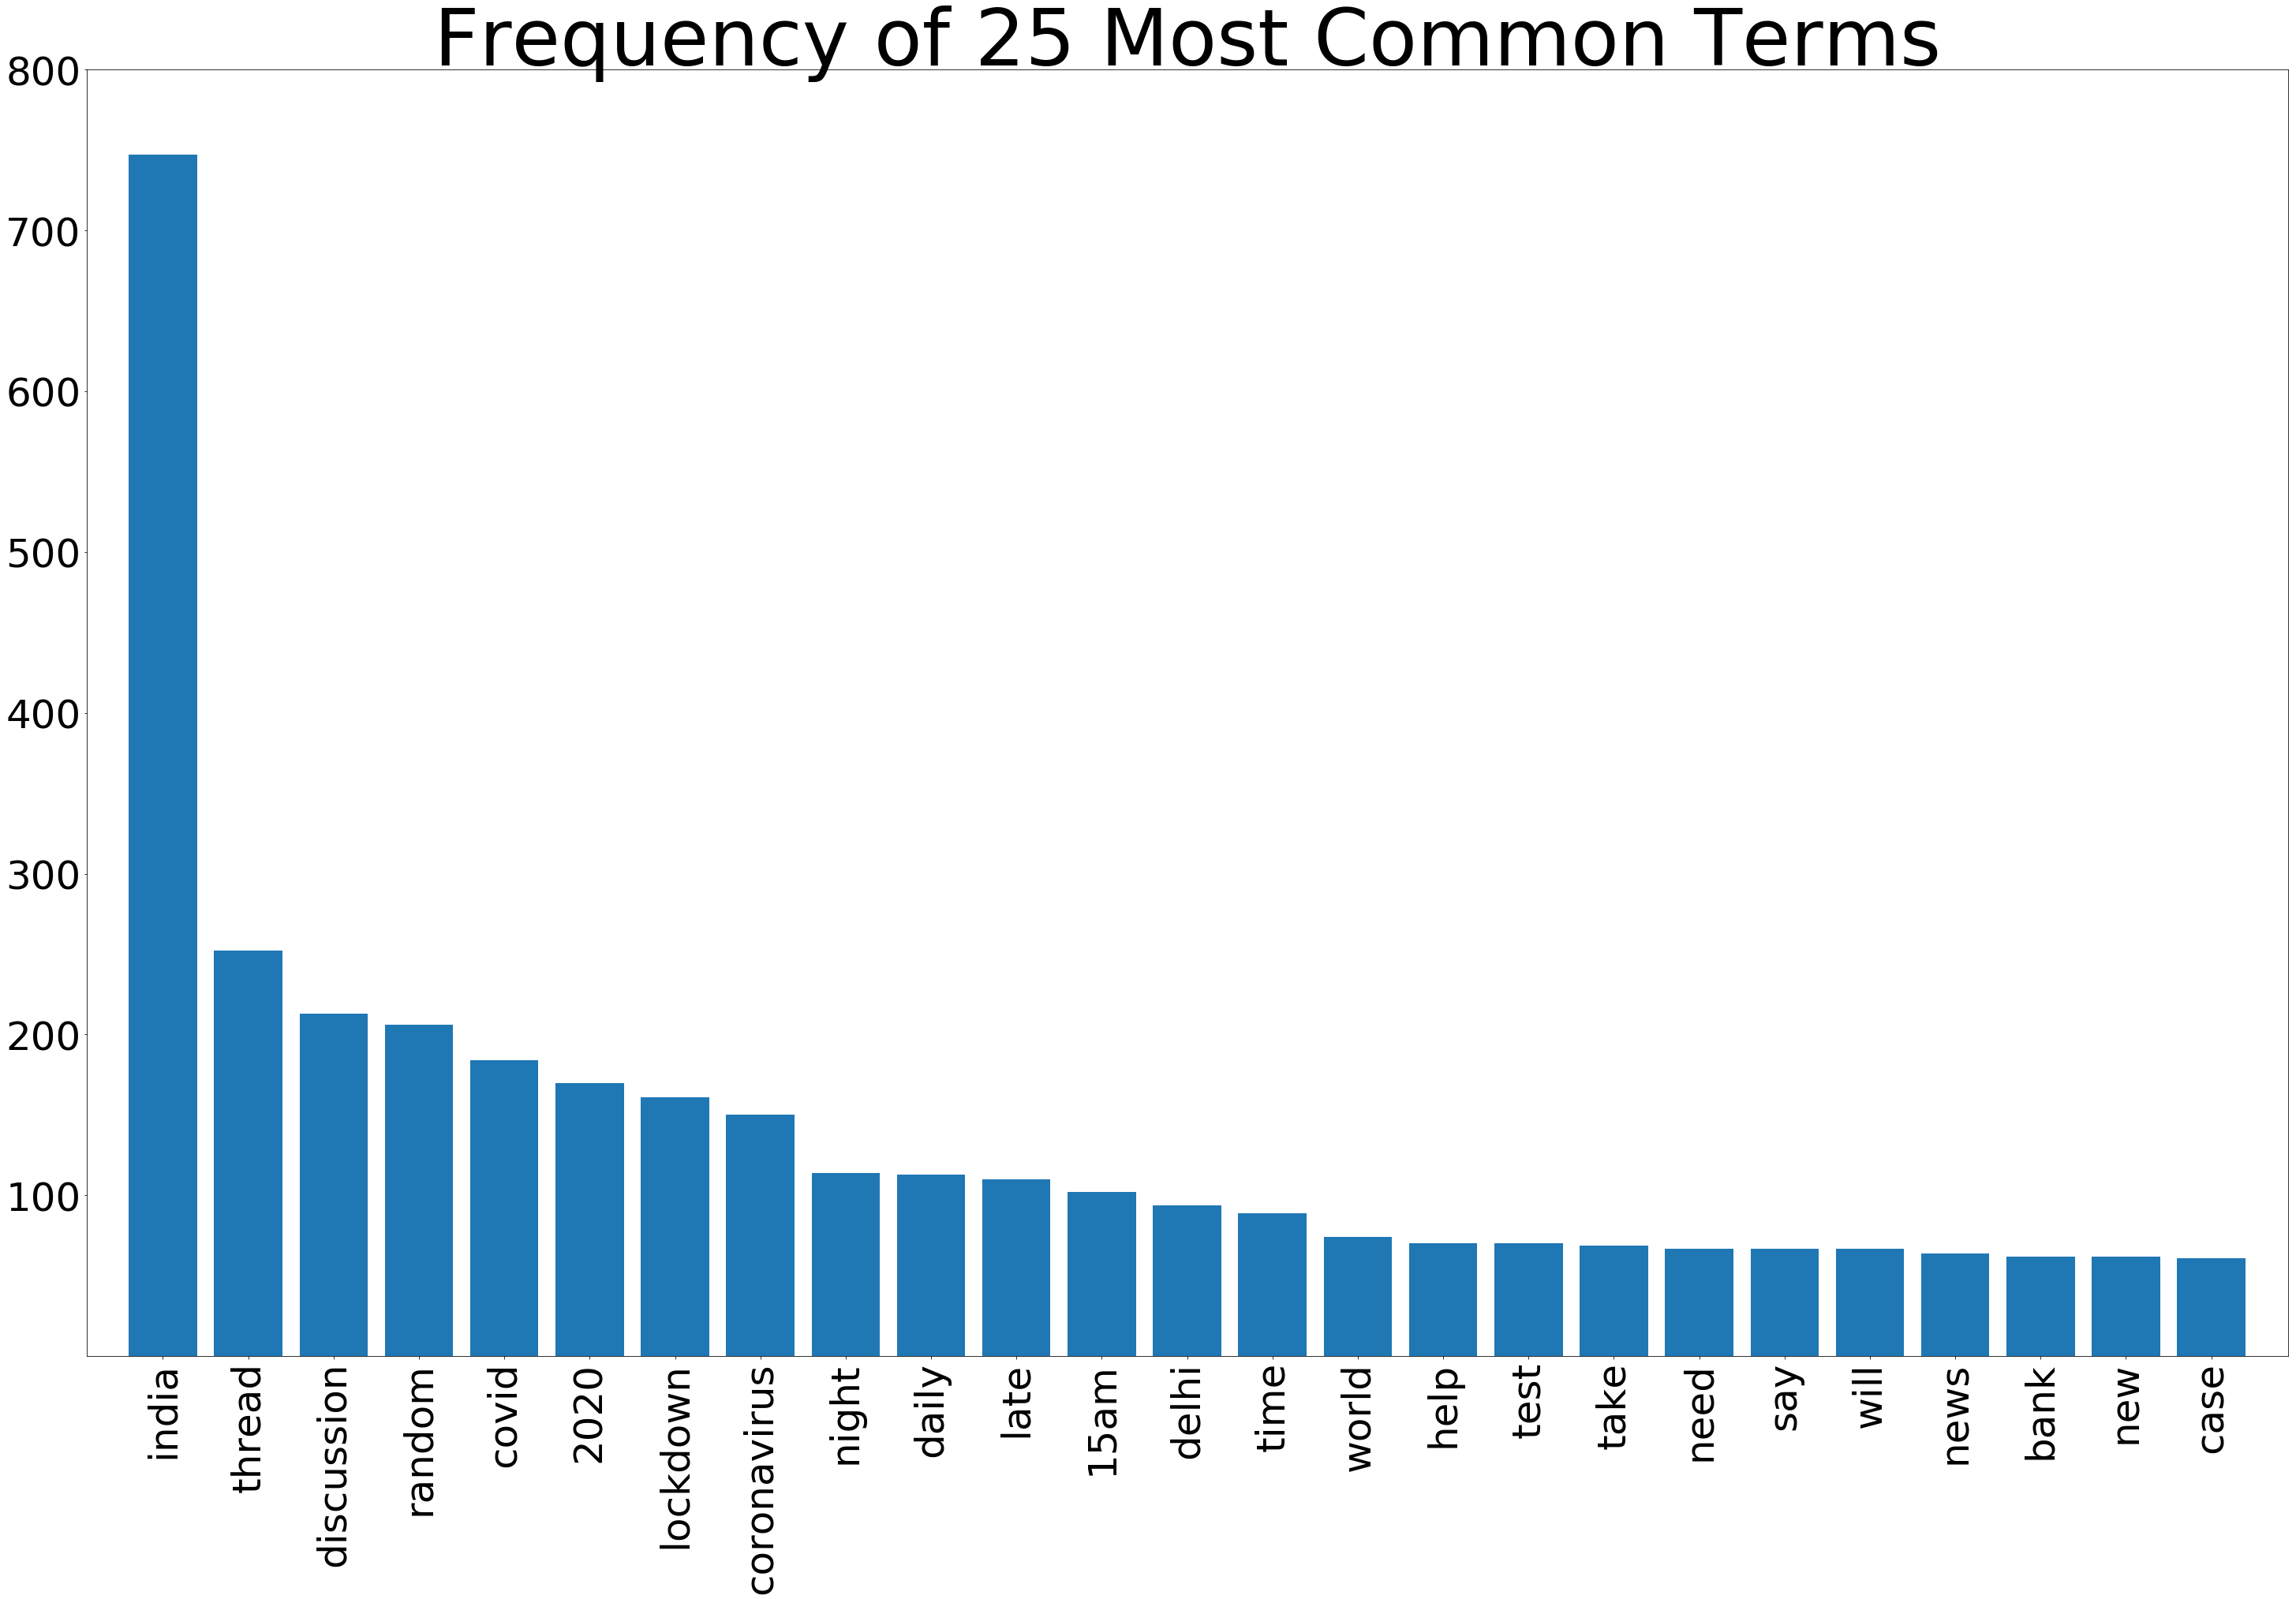

In [131]:
x, y = zip(*mostcommon)
# create a figure
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
# plt.xlabel('Terms', fontsize=100)
# plt.ylabel('Freq', fontsize=100)
plt.yticks([100, 200, 300, 400, 500, 600, 700, 800],fontsize=50)
plt.xticks(rotation=90,fontsize=50)
plt.title('Frequency of 25 Most Common Terms', fontsize=100)
plt.show()

At the begining we stored the polaity or sentiments of each question...now seeing the distribution of them

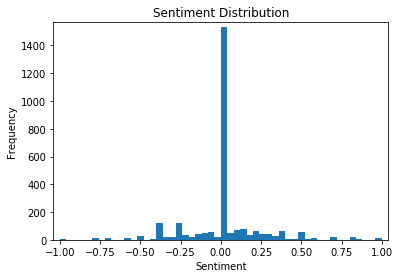

In [132]:
# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.hist(df['sentiment_questions'], bins=50)
plt.title('Sentiment Distribution')
plt.show()

many questions are neutral

more negative sentiments with high frequency are present in questions than positive sentiments

#### Distribution of  string length

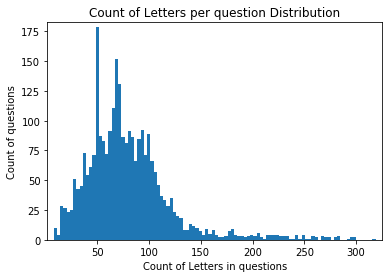

In [133]:
# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in questions')
plt.ylabel('Count of questions')
plt.hist(df['len_questions'], bins=100)
plt.title('Count of Letters per question Distribution')
plt.show()


Many questions are having less than 150 words..heighest string length is greater than 300


#### Average Distribution of string length for each flair

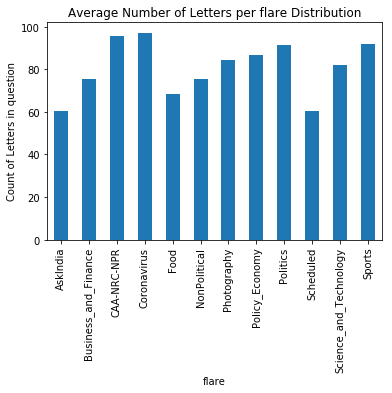

In [134]:
# df.len_questions
letter_avg = df.groupby('flare')['len_questions'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Letters in question')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Letters per flare Distribution')
plt.show()
#print(letter_avg)

so average length questions  in corona virus , CAA politics and sports are greater than other flairs

#### Distriburion of word counts in questions

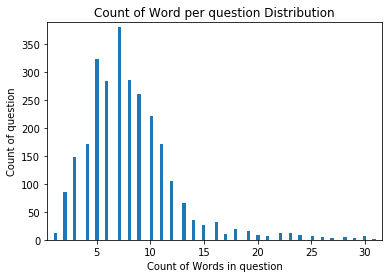

In [135]:
# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in question')
plt.ylabel('Count of question')
plt.hist(df['word_count_questions'], bins=100)
plt.title('Count of Word per question Distribution')
plt.show()

many questions have less than 10 words..heighest word count is greater than 30

#### Aveagr word count for each flair

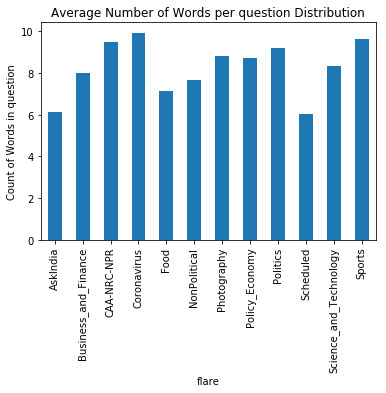

In [136]:
word_avg = df.groupby('flare')['word_count_questions'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Words in question')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Words per question Distribution')
plt.show()

so more words are present in sports and coronavirus 

In [137]:
# # flares=list(df.flare.unique())
# # boxplot_data =[]
# # for i in flares:
# #     boxplot_data.append(df.loc[df['flare']==i]['sentiment_questions'])
# # plt.figure(figsize=(50,30))
# plt.margins(0.02)
# plt.xlabel('flares')
# plt.ylabel('Sentiment')
# plt.boxplot(boxplot_data)
# plt.title('Sentiment Boxplot for questions by flare')
# plt.show() 

#### sentiment of questions for each flair type

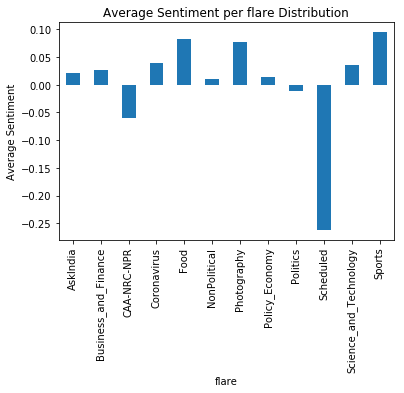

In [138]:
polarity_avg = df.groupby('flare')['sentiment_questions'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Average Sentiment')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=35)
plt.title('Average Sentiment per flare Distribution')
plt.show()

CAA questions are negative and sports,food,photography related questions are positive

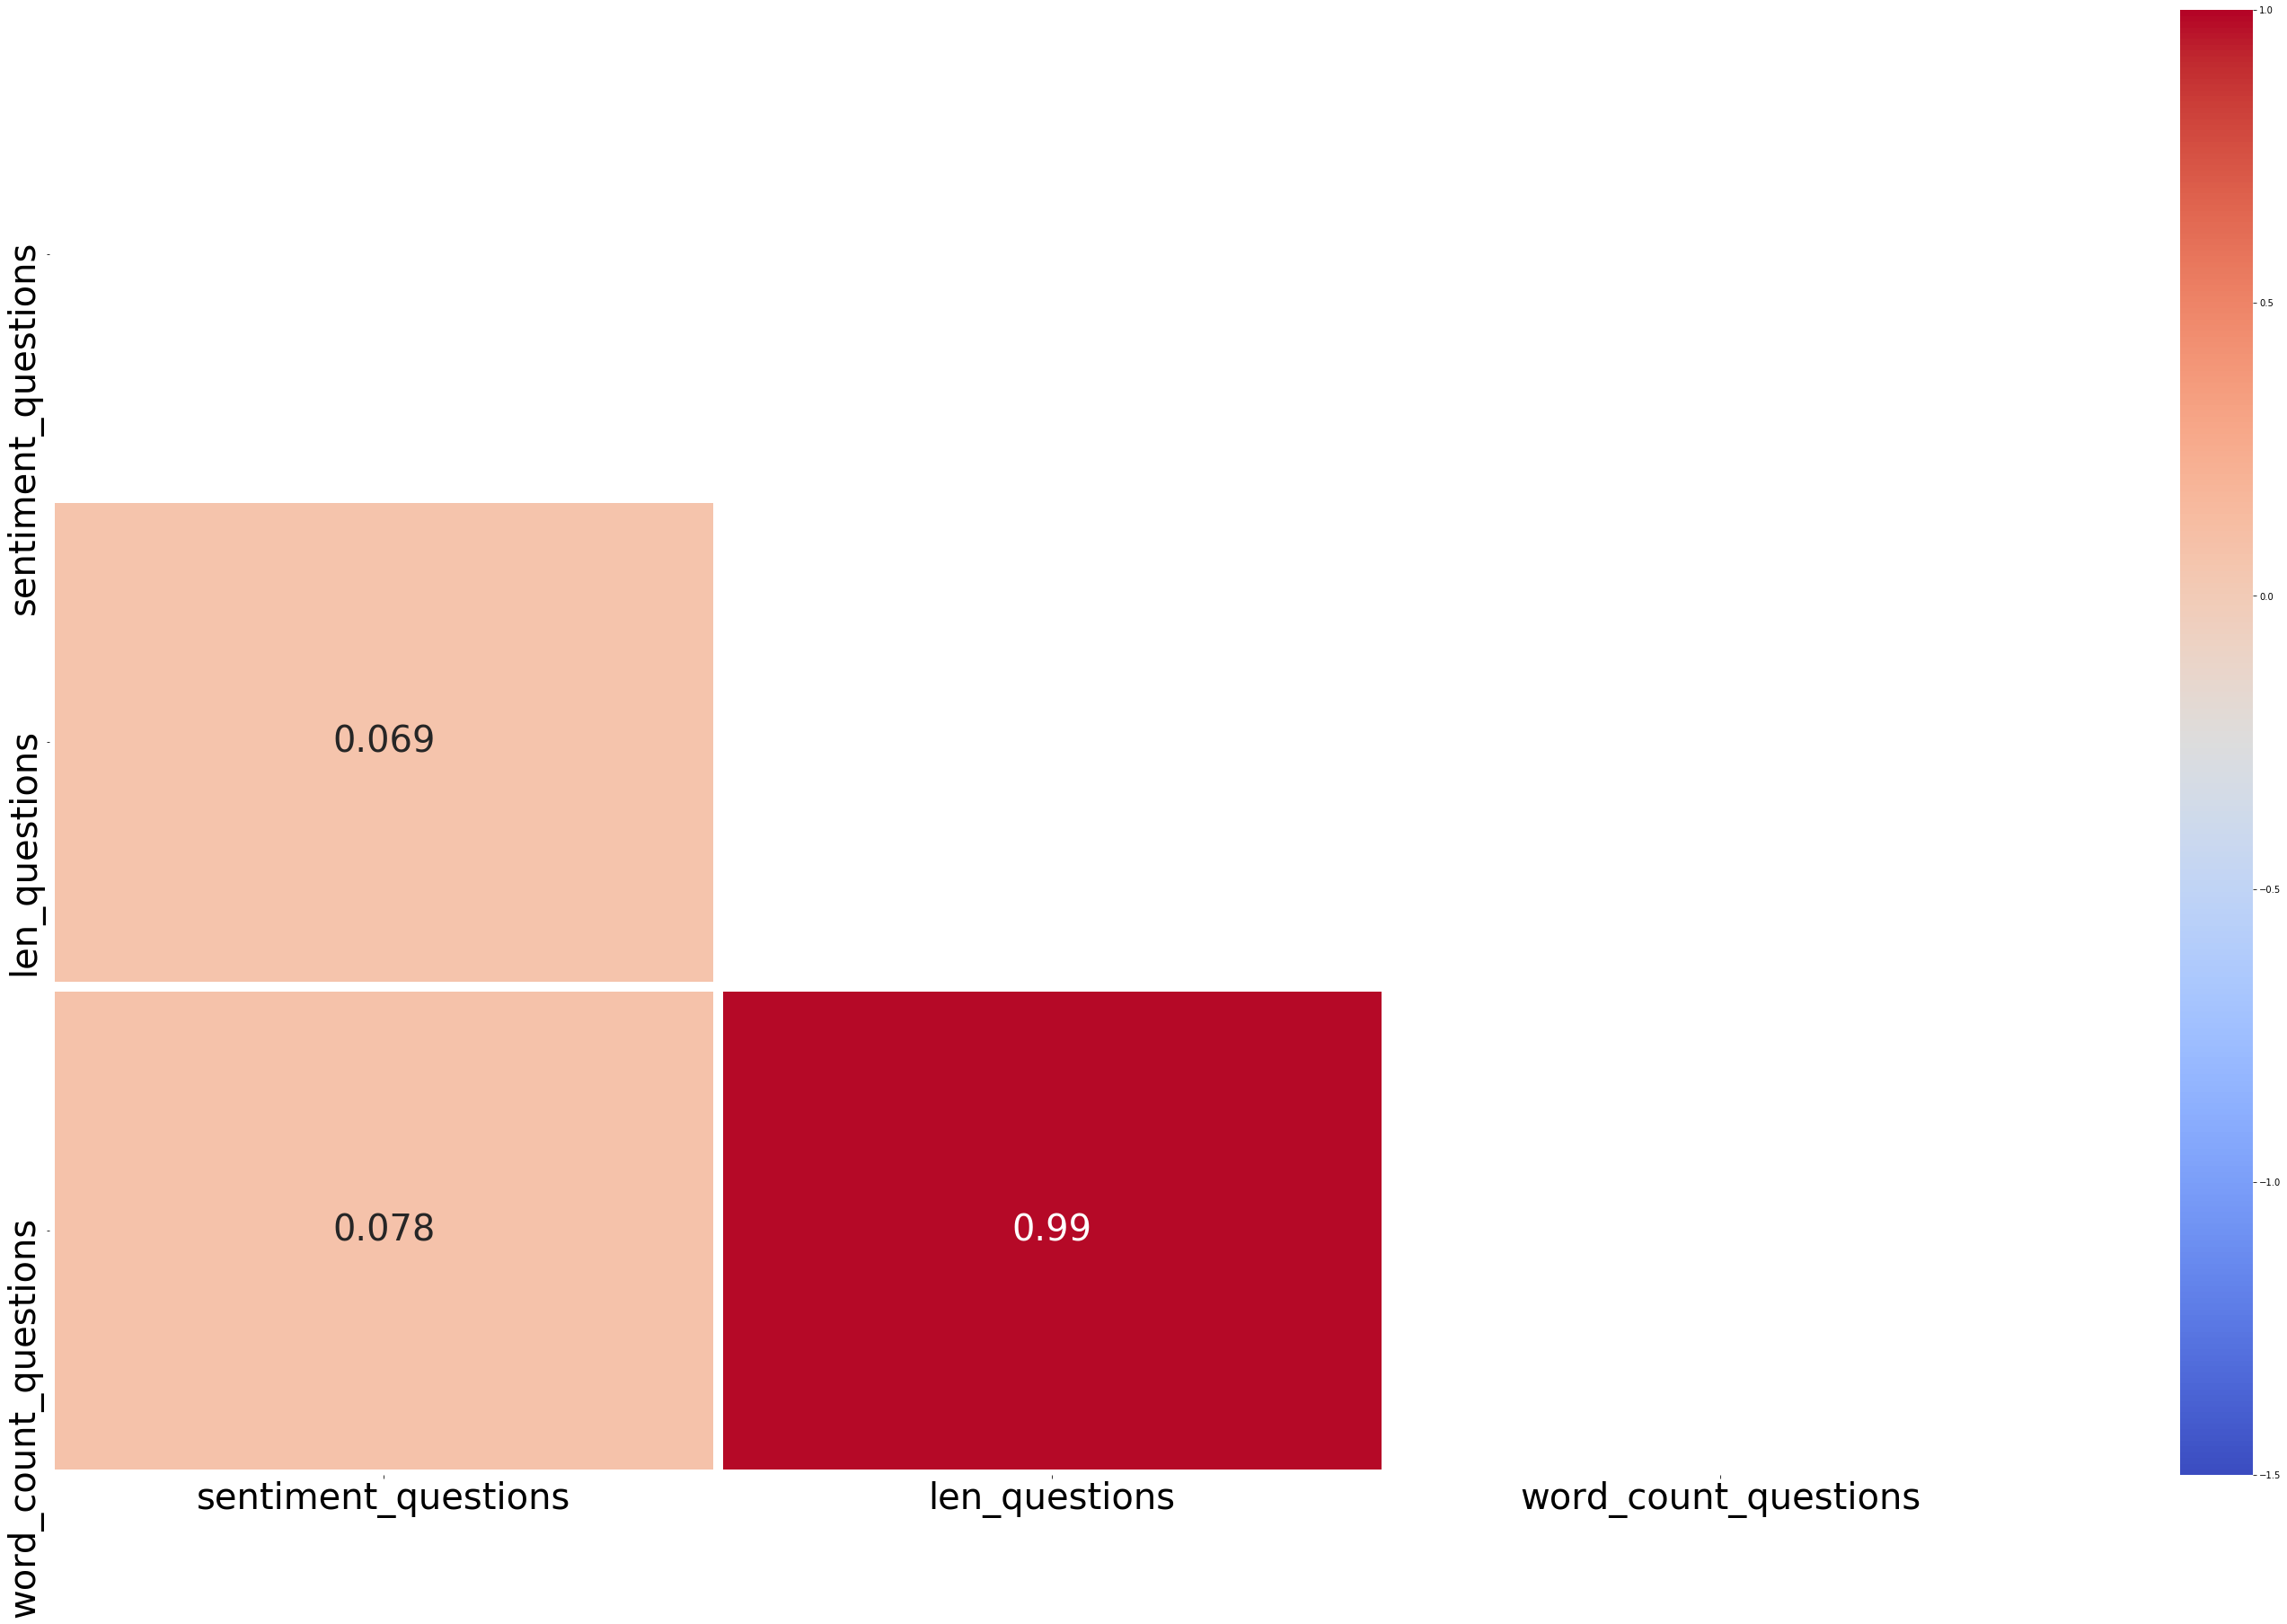

In [139]:
correlation = df[['flare','sentiment_questions', 'len_questions', 'word_count_questions']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

# explanations

*doing the same distributions and graphs for what we did in questions*

In [140]:
from ast import literal_eval
df.lematized_explanation=df.lematized_explanation.apply(lambda x:literal_eval(x))

words = df['lematized_explanation']
allwords = []
for wordlist in words:
    allwords += wordlist

FreqDist(allwords)

FreqDist({'india': 717, 'will': 536, 'bot': 410, 'people': 407, 'one': 301, 'time': 282, 'problem': 282, 'know': 277, 'now': 275, 'make': 274, ...})

In [141]:
fdist = FreqDist(allwords)
mostcommon = fdist.most_common(25)
print(mostcommon)


[('india', 717), ('will', 536), ('bot', 410), ('people', 407), ('one', 301), ('time', 282), ('problem', 282), ('know', 277), ('now', 275), ('make', 274), ('http', 270), ('work', 263), ('use', 259), ('share', 249), ('want', 243), ('help', 236), ('go', 224), ('please', 224), ('year', 223), ('government', 216), ('even', 213), ('need', 211), ('hotstar', 207), ('creator', 206), ('beep', 204)]


flare
AskIndia                  [(will, 129), (india, 118), (people, 113), (kn...
Business_and_Finance      [(will, 75), (real, 52), (market, 49), (estate...
CAA-NRC-NPR               [(citizenship, 4), (caa, 3), (act, 3), (india,...
Coronavirus               [(test, 32), (via, 24), (will, 23), (india, 23...
Food                      [(india, 55), (food, 52), (coffee, 37), (make,...
NonPolitical              [(india, 84), (people, 76), (will, 42), (know,...
Photography               [(photography, 11), (take, 5), (good, 4), (hel...
Policy_Economy            [(india, 161), (government, 129), (will, 108),...
Politics                  [(india, 38), (will, 36), (people, 28), (gover...
Scheduled                 [(bot, 409), (problem, 208), (beep, 204), (boo...
Science_and_Technology    [(hotstar, 197), (http, 112), (disney, 74), (i...
Sports                    [(india, 19), (sport, 16), (match, 16), (strea...
Name: list_lemma_explanation, dtype: object


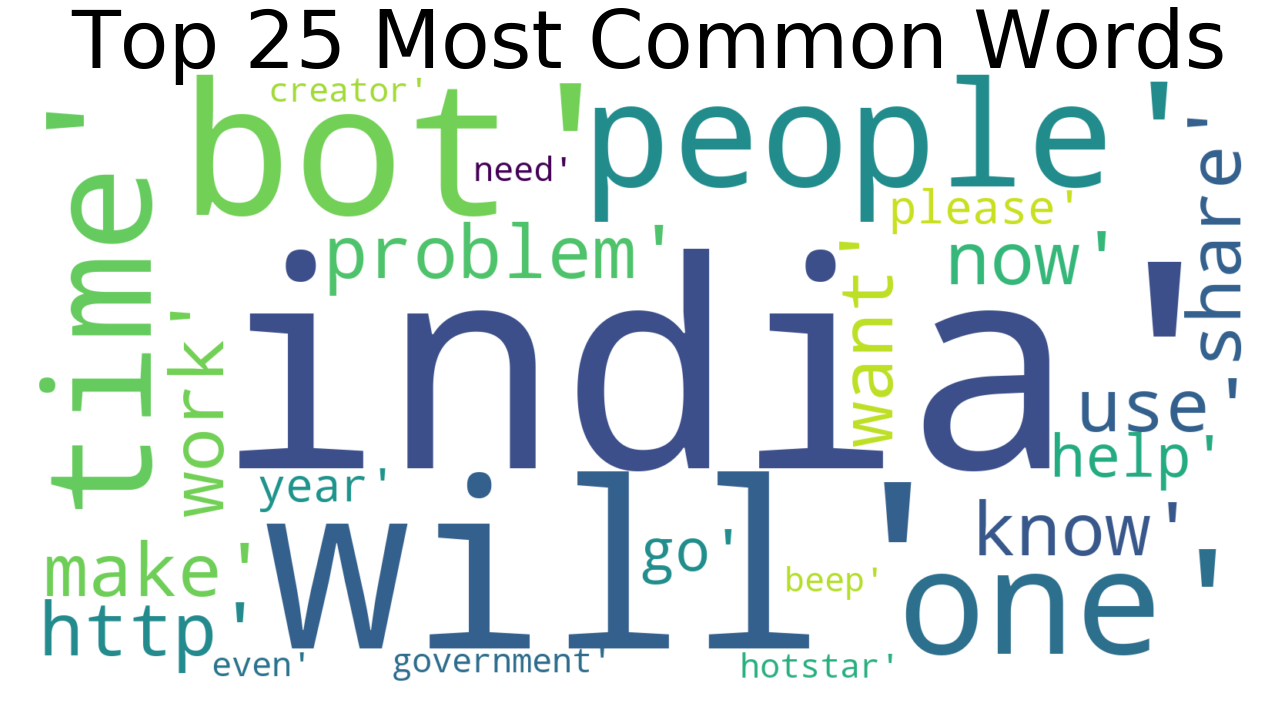

In [142]:
df.list_lemma_explanation=df.list_lemma_explanation.fillna(" ")
group_by = df.groupby('flare')['list_lemma_explanation'].apply(lambda x: Counter(' '.join(x).split()).most_common(20))
print(group_by)




dfgroup_by = pd.DataFrame(group_by)
dfgroup_by.reset_index(inplace=True)




wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 25 Most Common Words', fontsize=80)
plt.tight_layout(pad=1)
plt.show()

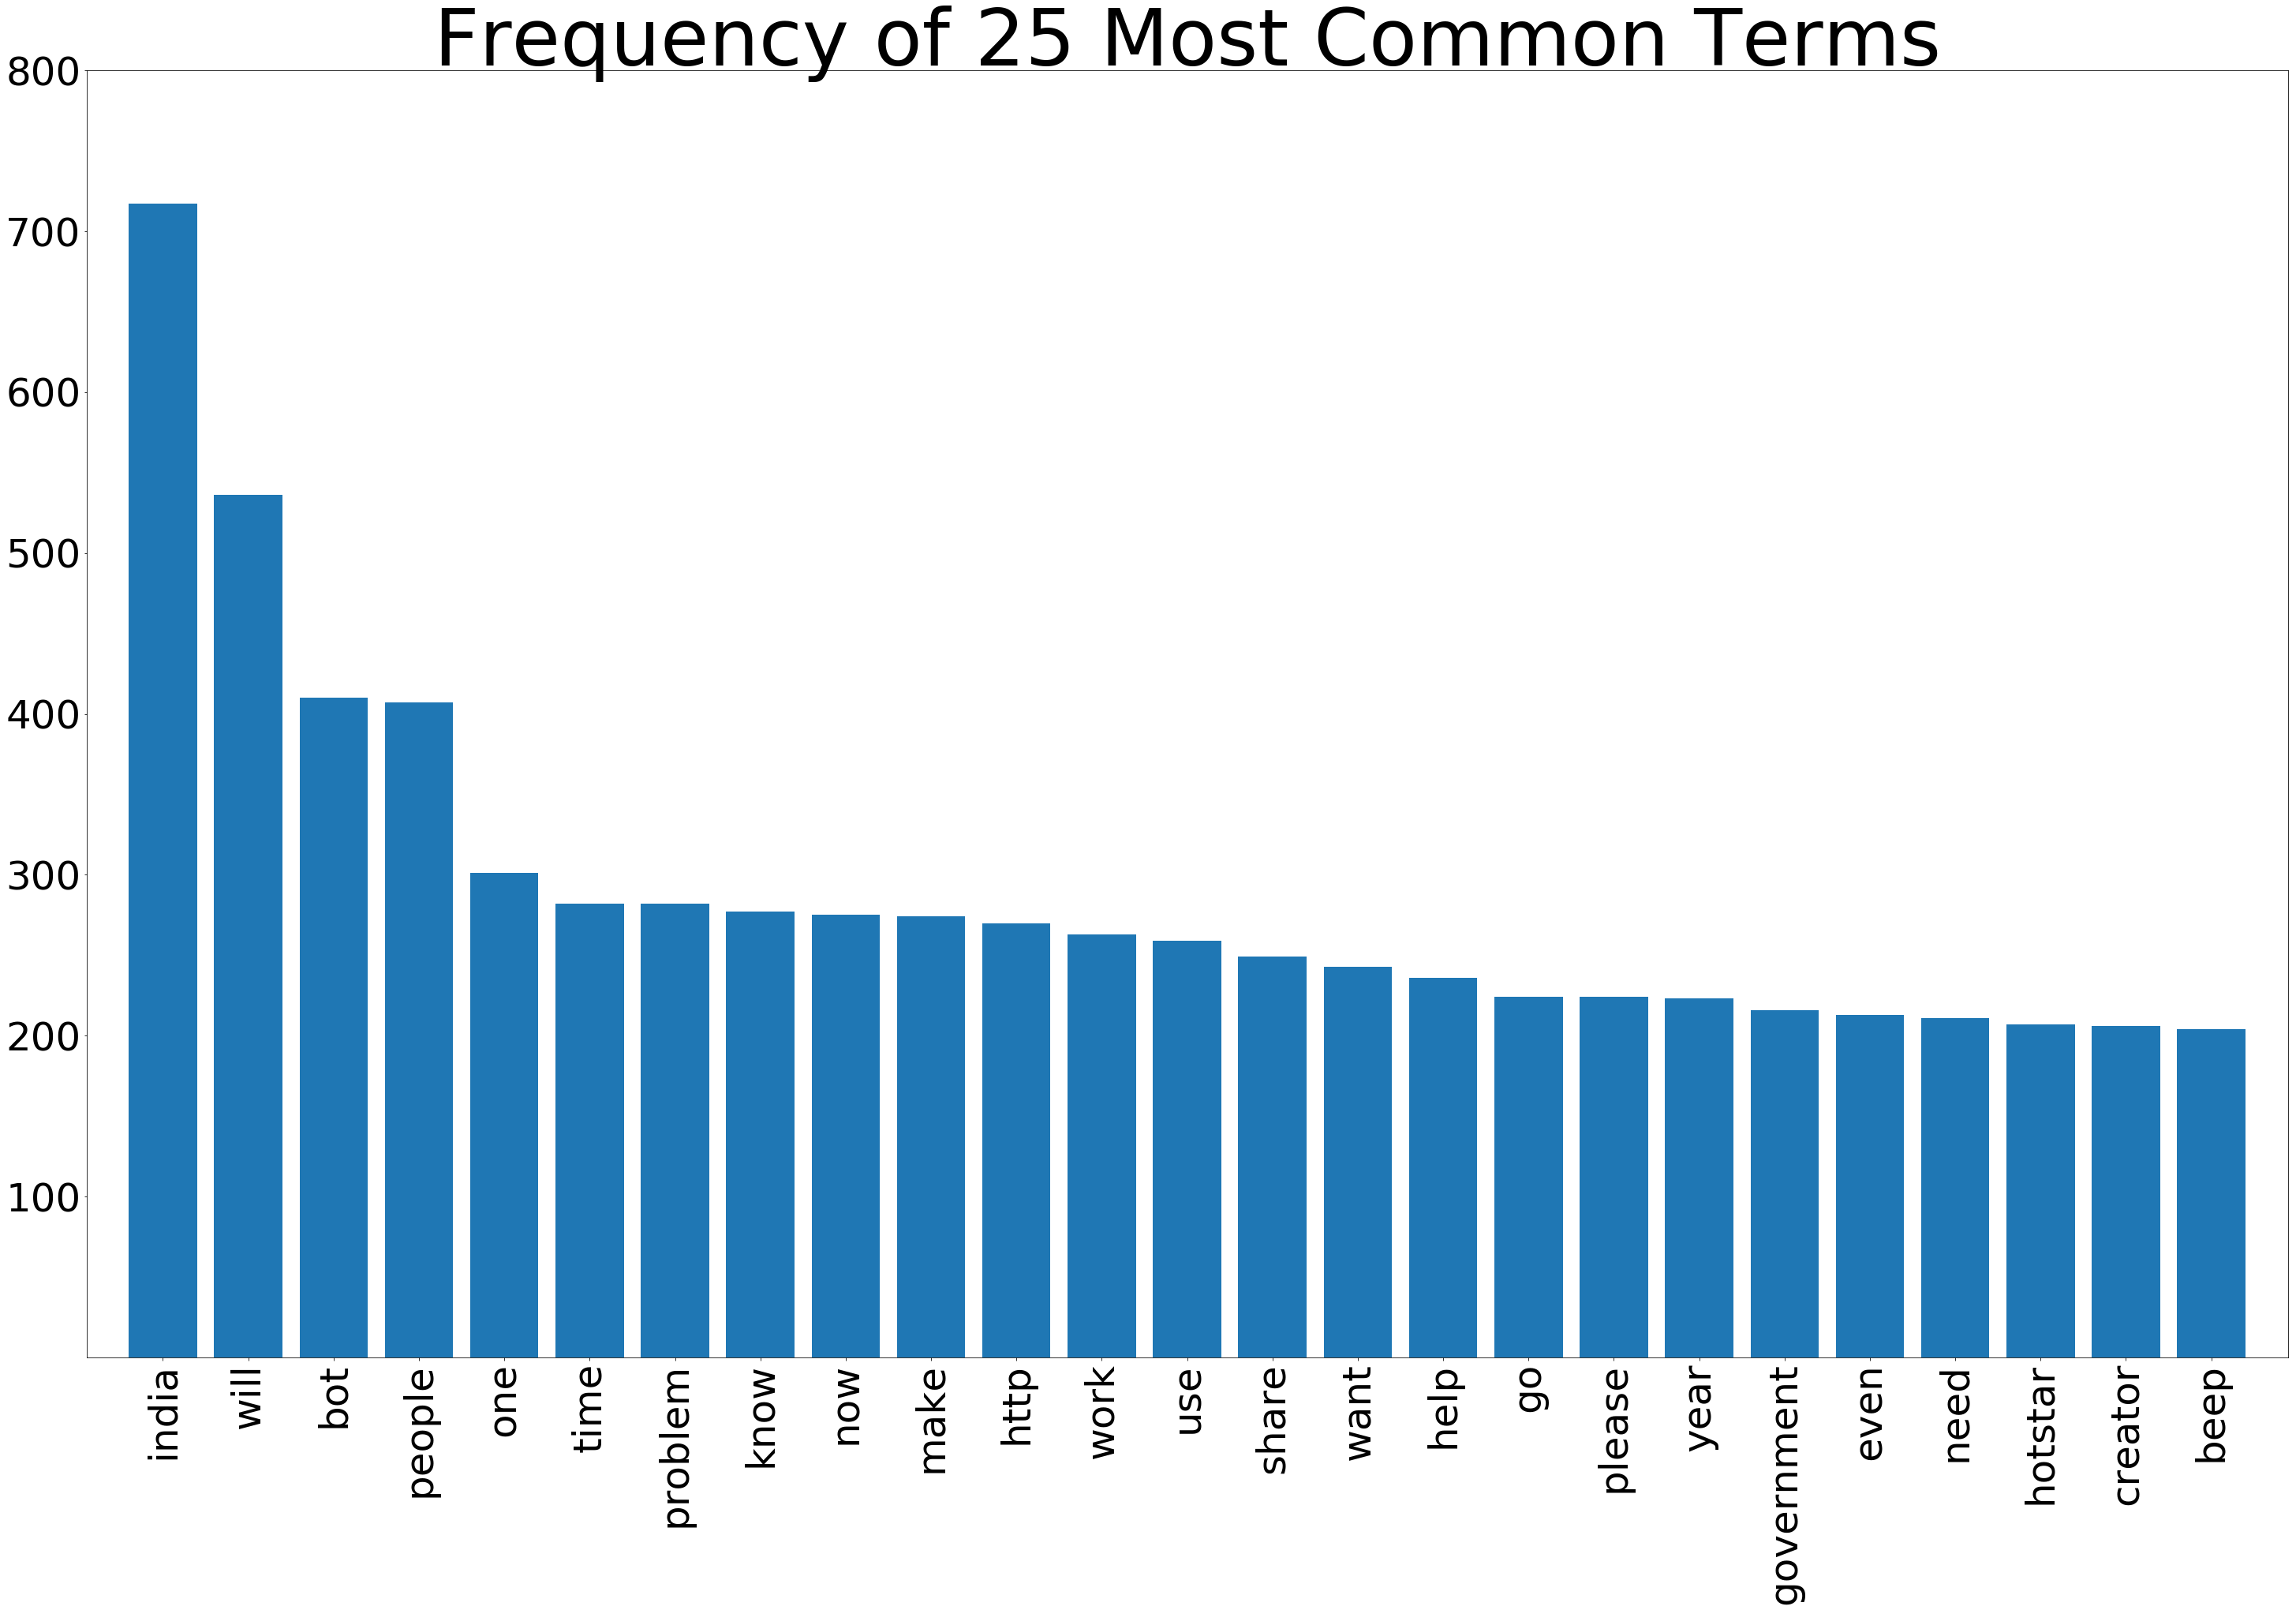

In [143]:
x, y = zip(*mostcommon)
# create a figure
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
# plt.xlabel('Terms', fontsize=100)
# plt.ylabel('Freq', fontsize=100)
plt.yticks([100, 200, 300, 400, 500, 600, 700, 800],fontsize=50)
plt.xticks(rotation=90,fontsize=50)
plt.title('Frequency of 25 Most Common Terms', fontsize=100)
plt.show()

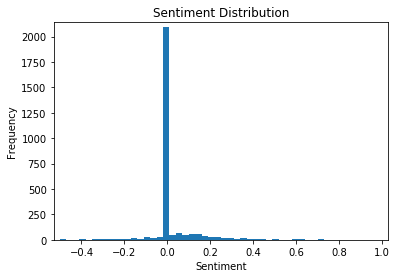

In [144]:
# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.hist(df['sentiment_explanation'], bins=50)
plt.title('Sentiment Distribution')
plt.show()

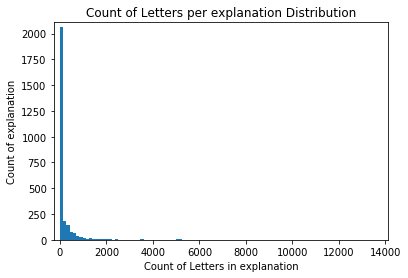

In [145]:

# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in explanation')
plt.ylabel('Count of explanation')
plt.hist(df['len_explanation'], bins=100)
plt.title('Count of Letters per explanation Distribution')
plt.show()







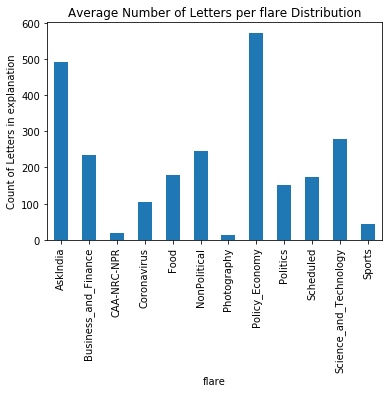

In [146]:
# df.len_explanation
letter_avg = df.groupby('flare')['len_explanation'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Letters in explanation')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Letters per flare Distribution')
plt.show()
#print(letter_avg)







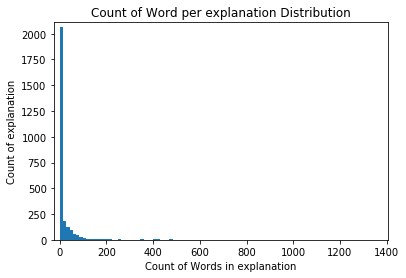

In [147]:

# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in explanation')
plt.ylabel('Count of explanation')
plt.hist(df['word_count_explanation'], bins=100)
plt.title('Count of Word per explanation Distribution')
plt.show()





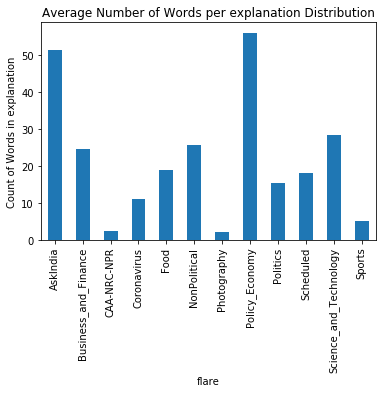

In [148]:
word_avg = df.groupby('flare')['word_count_explanation'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Words in explanation')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Words per explanation Distribution')
plt.show()






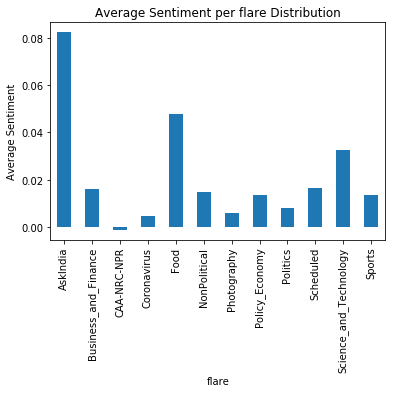

In [149]:
polarity_avg = df.groupby('flare')['sentiment_explanation'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Average Sentiment')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=35)
plt.title('Average Sentiment per flare Distribution')
plt.show()




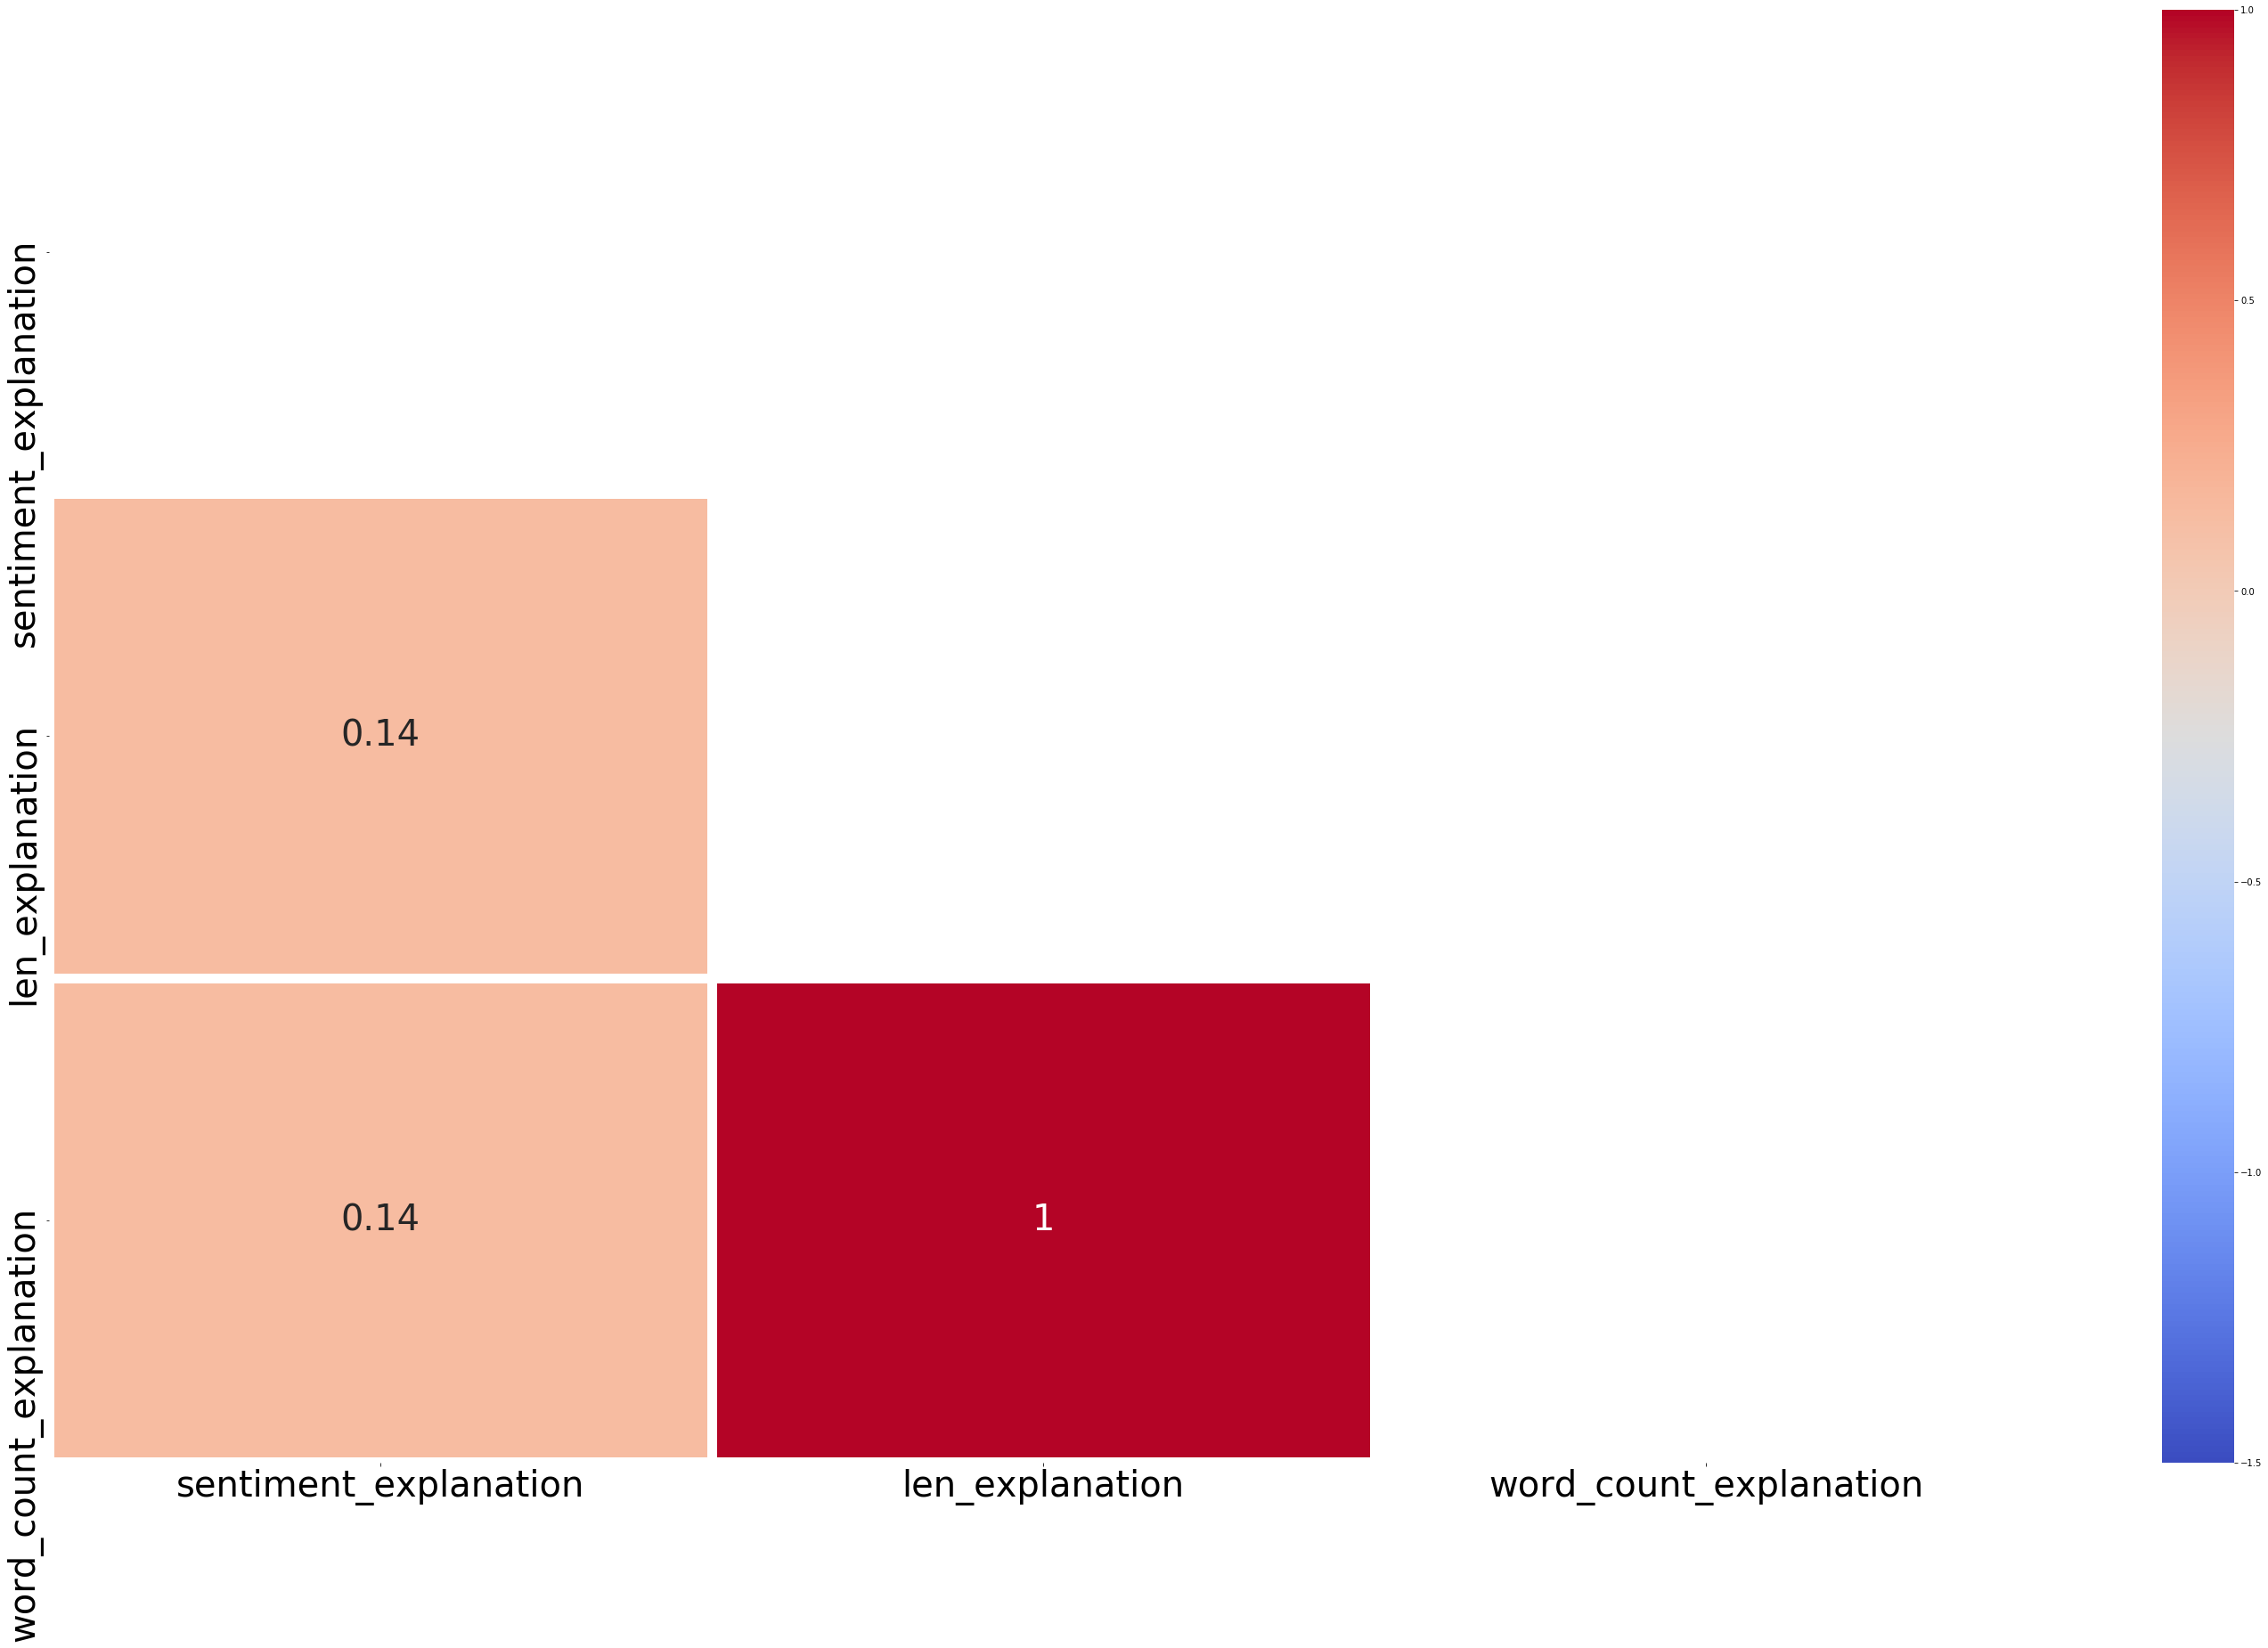

In [150]:

correlation = df[['flare','sentiment_explanation', 'len_explanation', 'word_count_explanation']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)




# comments
*doing the same distrinution and graphs for what we did in questions and explanation*

[('will', 2574), ('india', 1891), ('people', 1719), ('one', 1437), ('good', 1305), ('time', 1242), ('make', 1197), ('say', 1095), ('use', 1076), ('now', 1031), ('think', 1014), ('even', 1013), ('go', 988), ('take', 985), ('know', 958), ('well', 914), ('work', 893), ('need', 846), ('day', 836), ('want', 812), ('get', 806), ('hai', 805), ('see', 801), ('year', 762), ('look', 740)]


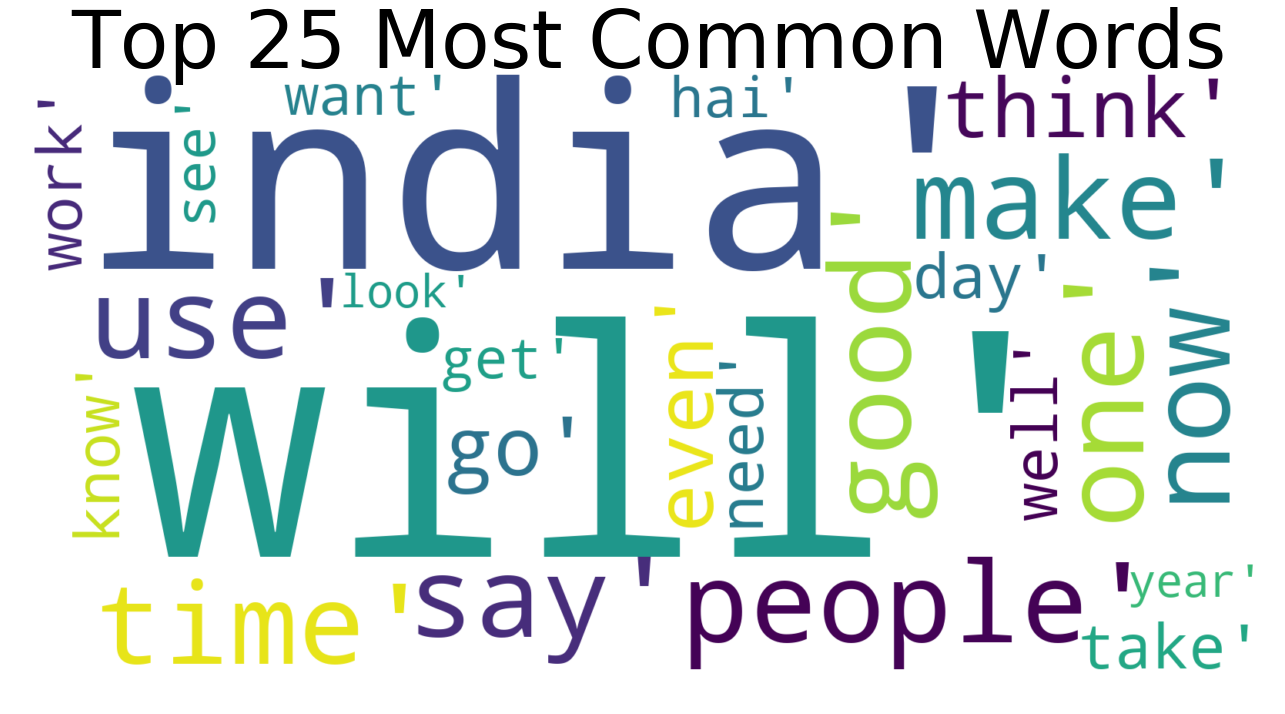

In [157]:
# freqdist takes a iterable of strings but df['lemmatize'] is an iterable of lists.  We need to combine all the 
# lists together into one list of iterable strings
from ast import literal_eval

df.lematized_comments=df.lematized_comments.fillna(" ")
# df.lematized_comments=df.lematized_comments.apply(lambda x:literal_eval(x))

words = df['lematized_comments']
allwords = []
for wordlist in words:
    allwords += wordlist

FreqDist(allwords)



fdist = FreqDist(allwords)
mostcommon = fdist.most_common(25)
print(mostcommon)





# group_by = df.groupby('flare')['list_lemma_comments'].apply(lambda x: Counter(' '.join(x).split()).most_common(20))
# print(group_by)




# dfgroup_by = pd.DataFrame(group_by)
# dfgroup_by.reset_index(inplace=True)




wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 25 Most Common Words', fontsize=80)
plt.tight_layout(pad=1)
plt.show()




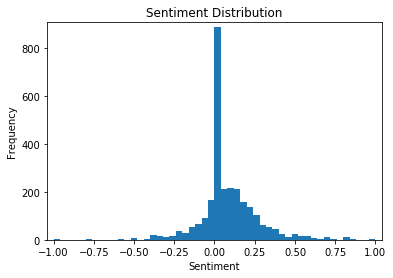

In [158]:

# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.hist(df['sentiment_comments'], bins=50)
plt.title('Sentiment Distribution')
plt.show()




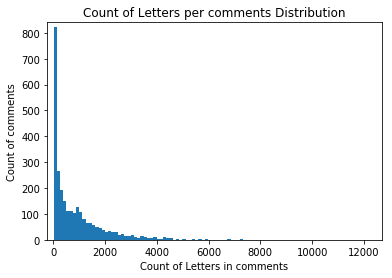

In [159]:


# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in comments')
plt.ylabel('Count of comments')
plt.hist(df['len_comments'], bins=100)
plt.title('Count of Letters per comments Distribution')
plt.show()





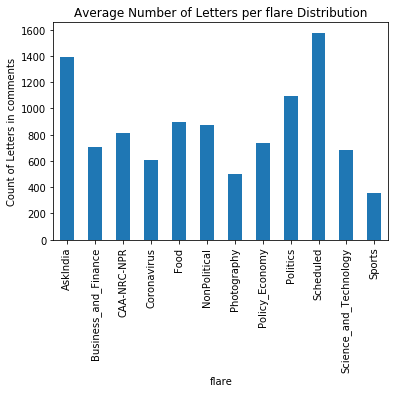

In [160]:


# df.len_comments
letter_avg = df.groupby('flare')['len_comments'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Letters in comments')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Letters per flare Distribution')
plt.show()
#print(letter_avg)





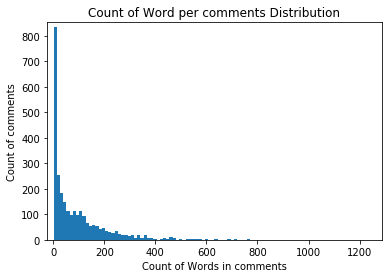

In [161]:



# plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in comments')
plt.ylabel('Count of comments')
plt.hist(df['word_count_comments'], bins=100)
plt.title('Count of Word per comments Distribution')
plt.show()




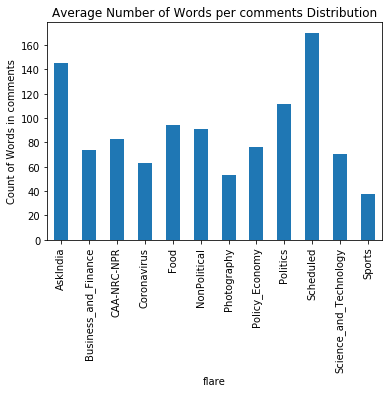

In [162]:

word_avg = df.groupby('flare')['word_count_comments'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Count of Words in comments')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
plt.title('Average Number of Words per comments Distribution')
plt.show()





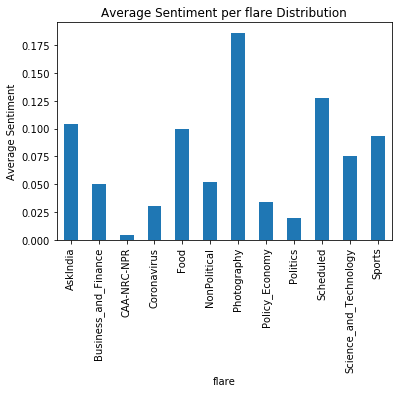

In [163]:

polarity_avg = df.groupby('flare')['sentiment_comments'].mean().plot(kind='bar')
plt.xlabel('flare')
plt.ylabel('Average Sentiment')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=35)
plt.title('Average Sentiment per flare Distribution')
plt.show()





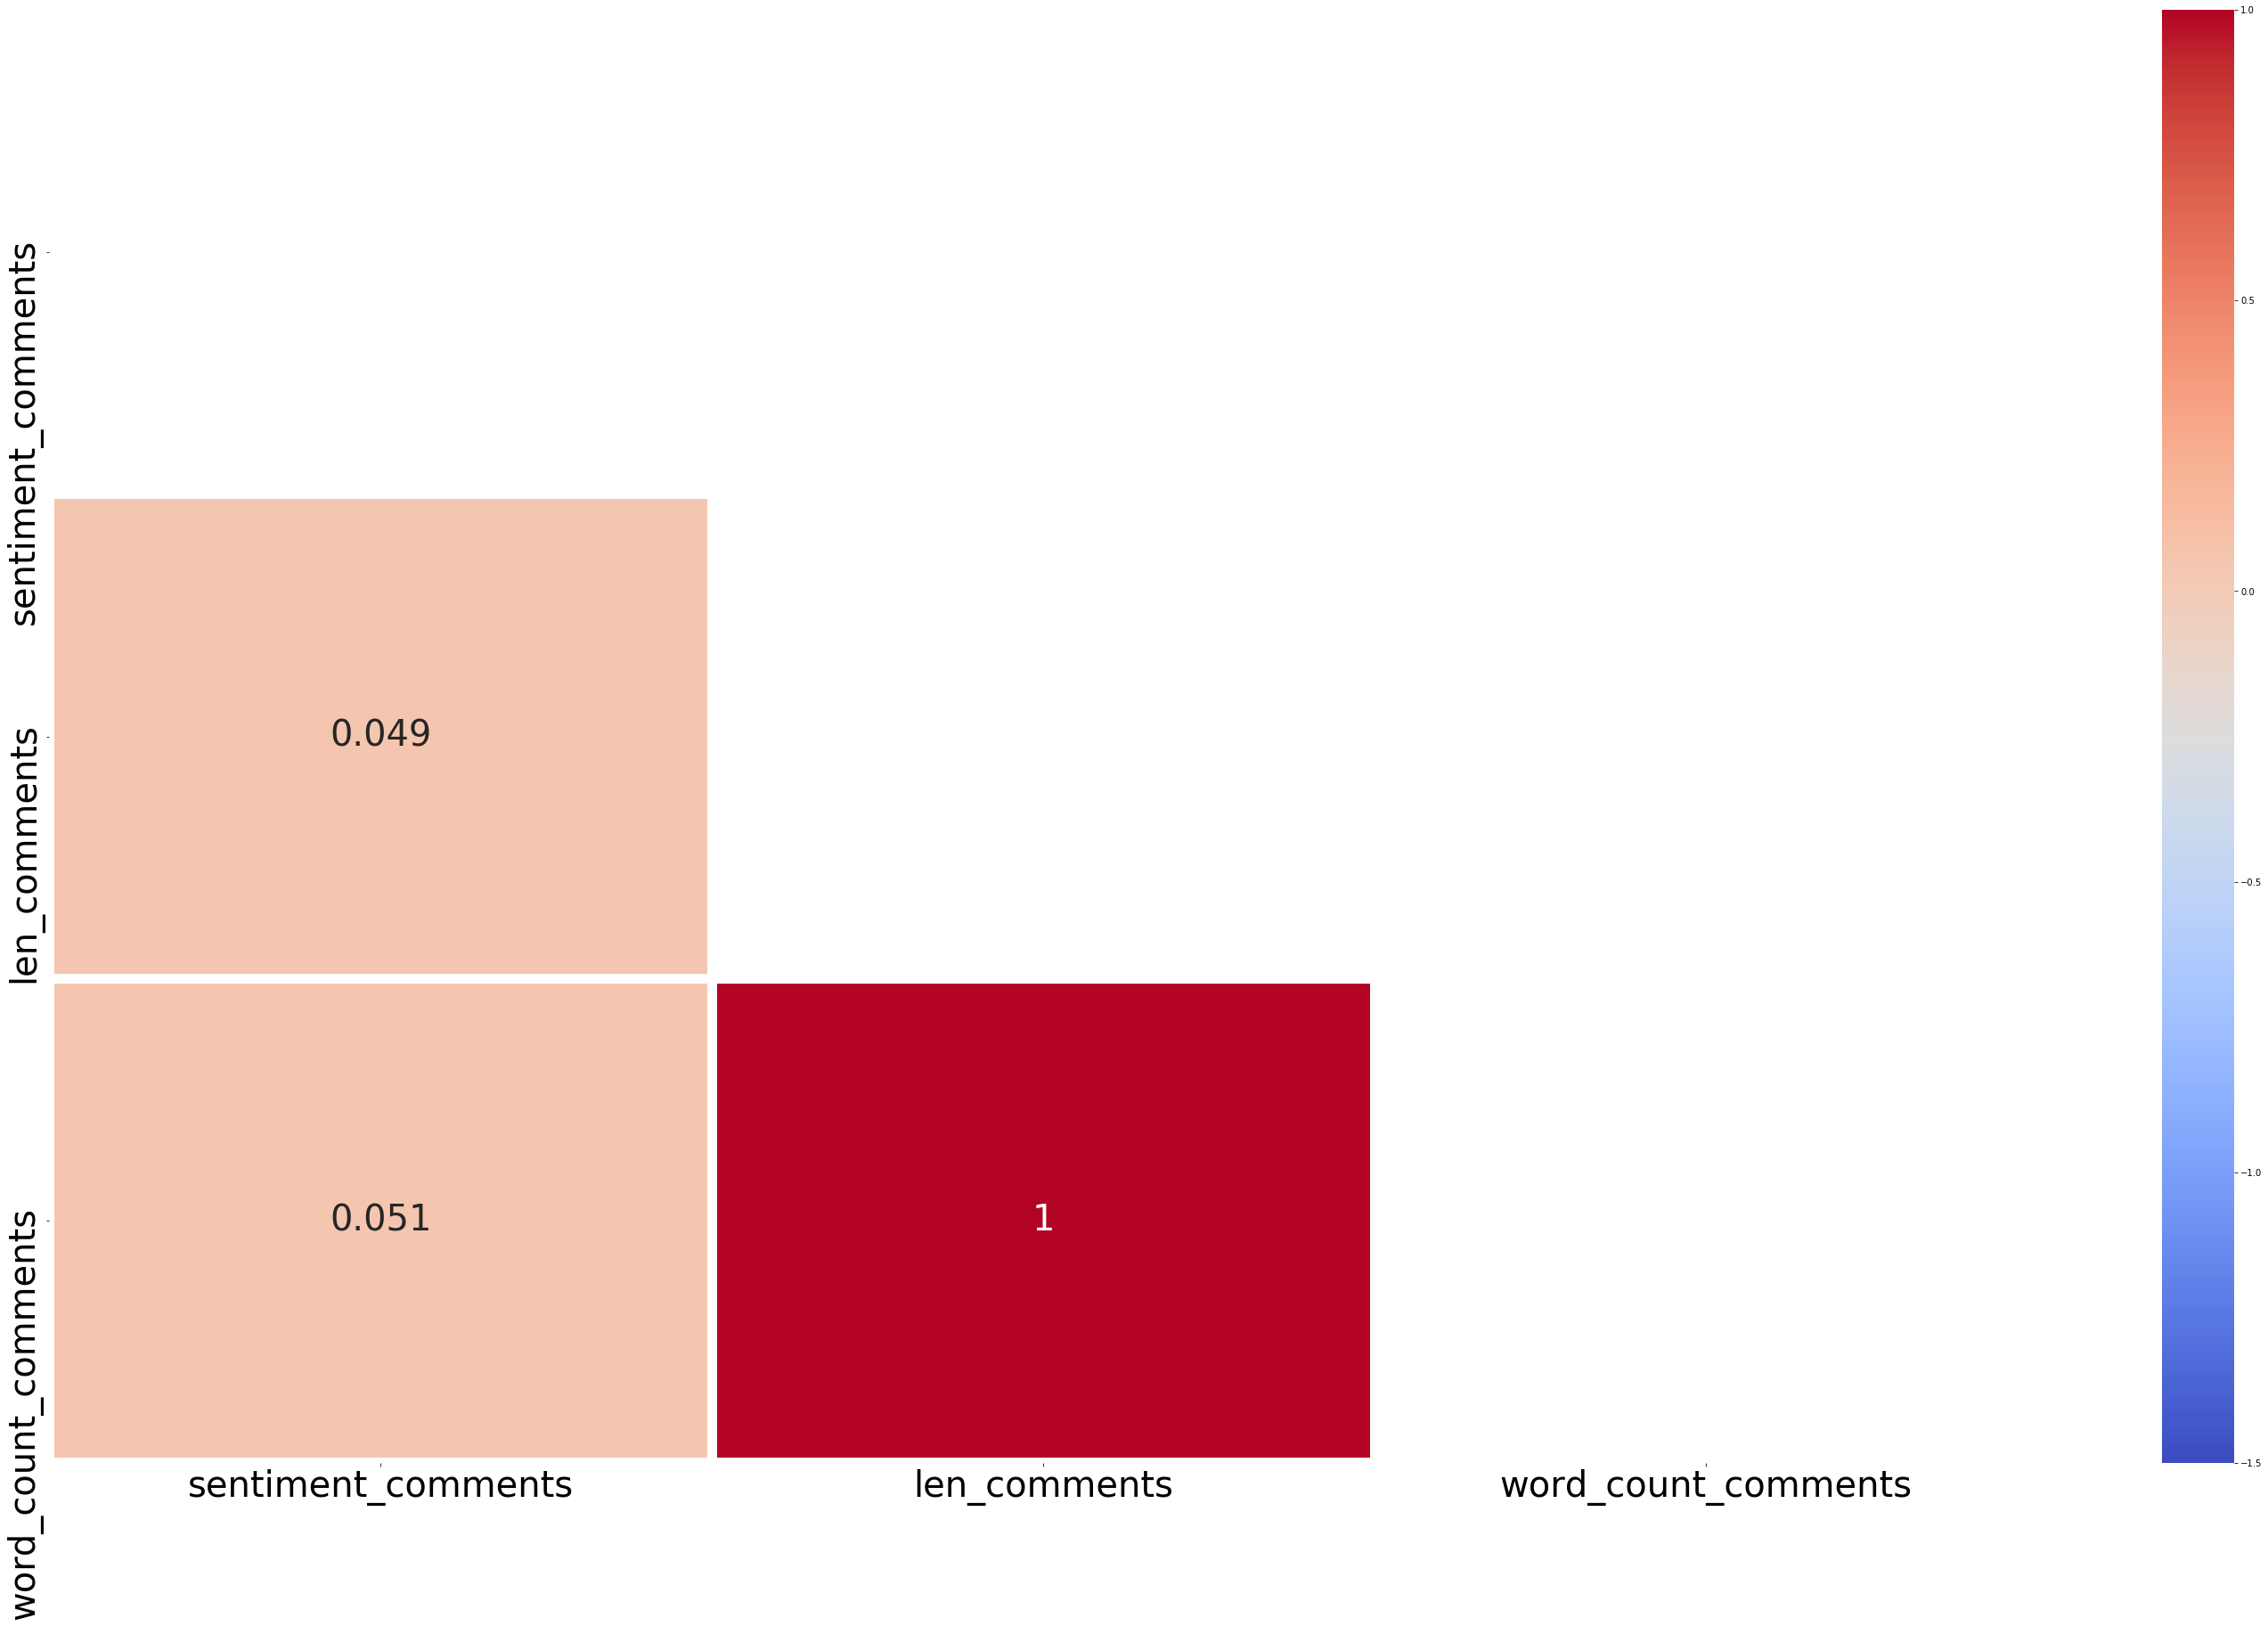

In [164]:

correlation = df[['flare','sentiment_comments', 'len_comments', 'word_count_comments']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

